In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-04-11 17:41:04.735566: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#"APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"
com='GOOGLE'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock,period="60d", interval="5m")
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-01-17 09:30:00-05:00,181.270004,181.559998,180.389999,180.669998,180.669998,3357979,APPLE
2024-01-17 09:35:00-05:00,180.660004,180.965607,180.529999,180.610001,180.610001,1090139,APPLE
2024-01-17 09:40:00-05:00,180.610001,180.940002,180.300003,180.395401,180.395401,1134458,APPLE
2024-01-17 09:45:00-05:00,180.409805,180.878098,180.389999,180.869995,180.869995,927279,APPLE
2024-01-17 09:50:00-05:00,180.869995,181.520004,180.750000,180.919998,180.919998,1295288,APPLE
...,...,...,...,...,...,...,...
2024-04-11 15:35:00-04:00,157.199997,157.320007,157.149994,157.190002,157.190002,58254,GENERAL_ELC
2024-04-11 15:40:00-04:00,157.199997,157.539993,157.175003,157.509995,157.509995,61422,GENERAL_ELC
2024-04-11 15:45:00-04:00,157.509903,157.570007,157.410004,157.449997,157.449997,80686,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2024-01-17 09:30:00-05:00,181.270004,181.559998,180.389999,180.669998,180.669998,3357979,APPLE
1,2024-01-17 09:35:00-05:00,180.660004,180.965607,180.529999,180.610001,180.610001,1090139,APPLE
2,2024-01-17 09:40:00-05:00,180.610001,180.940002,180.300003,180.395401,180.395401,1134458,APPLE
3,2024-01-17 09:45:00-05:00,180.409805,180.878098,180.389999,180.869995,180.869995,927279,APPLE
4,2024-01-17 09:50:00-05:00,180.869995,181.520004,180.750000,180.919998,180.919998,1295288,APPLE
...,...,...,...,...,...,...,...,...
46742,2024-04-11 15:35:00-04:00,157.199997,157.320007,157.149994,157.190002,157.190002,58254,GENERAL_ELC
46743,2024-04-11 15:40:00-04:00,157.199997,157.539993,157.175003,157.509995,157.509995,61422,GENERAL_ELC
46744,2024-04-11 15:45:00-04:00,157.509903,157.570007,157.410004,157.449997,157.449997,80686,GENERAL_ELC
46745,2024-04-11 15:50:00-04:00,157.419998,157.445007,157.190002,157.404999,157.404999,173330,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-01-17 09:30:00-05:00,181.270004,181.559998,180.389999,180.669998,180.669998,3357979,APPLE
2024-01-17 09:35:00-05:00,180.660004,180.965607,180.529999,180.610001,180.610001,1090139,APPLE
2024-01-17 09:40:00-05:00,180.610001,180.940002,180.300003,180.395401,180.395401,1134458,APPLE
2024-01-17 09:45:00-05:00,180.409805,180.878098,180.389999,180.869995,180.869995,927279,APPLE
2024-01-17 09:50:00-05:00,180.869995,181.520004,180.750000,180.919998,180.919998,1295288,APPLE
...,...,...,...,...,...,...,...
2024-04-11 15:35:00-04:00,157.199997,157.320007,157.149994,157.190002,157.190002,58254,GENERAL_ELC
2024-04-11 15:40:00-04:00,157.199997,157.539993,157.175003,157.509995,157.509995,61422,GENERAL_ELC
2024-04-11 15:45:00-04:00,157.509903,157.570007,157.410004,157.449997,157.449997,80686,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2024-01-17 09:30:00-05:00,180.669998
2024-01-17 09:35:00-05:00,180.610001
2024-01-17 09:40:00-05:00,180.395401
2024-01-17 09:45:00-05:00,180.869995
2024-01-17 09:50:00-05:00,180.919998
...,...
2024-04-11 15:35:00-04:00,157.190002
2024-04-11 15:40:00-04:00,157.509995
2024-04-11 15:45:00-04:00,157.449997


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

39971

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.47191192],
       [-0.47210534],
       [-0.47279719],
       ...,
       [-0.54677047],
       [-0.54691554],
       [-0.546029  ]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
#x_train

In [20]:
y_train

[-0.4666937188767033,
 -0.4669632448280442,
 -0.4666892423551534,
 -0.4669377630899907,
 -0.46675338943318745,
 -0.46699546594469465,
 -0.4672695176101299,
 -0.4666137809918832,
 -0.46714058395098335,
 -0.4666247509293078,
 -0.46728402941075875,
 -0.4669616214740755,
 -0.4663346133018196,
 -0.46568979742845285,
 -0.46590713009007434,
 -0.4657059325830504,
 -0.46510243844706767,
 -0.46549637234346075,
 -0.4521172792443596,
 -0.45227848321270125,
 -0.4521495003610102,
 -0.4516900911878815,
 -0.4519238541593674,
 -0.4503119128610399,
 -0.4522462129035063,
 -0.4512790382860008,
 -0.449973369769759,
 -0.45015070889269826,
 -0.4508921881160164,
 -0.45005365200239056,
 -0.44921575539184333,
 -0.44930282619561646,
 -0.44976385872271385,
 -0.4486354801368667,
 -0.4484742761685251,
 -0.44799681333156316,
 -0.4496026547543722,
 -0.4482969862381304,
 -0.447378167891873,
 -0.4462175681893754,
 -0.4466357048176647,
 -0.44579844771019594,
 -0.4466002369930768,
 -0.4462659244606234,
 -0.44702353883853

In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
x_train.shape[1]

60

In [23]:
x_train

array([[[-0.47191192],
        [-0.47210534],
        [-0.47279719],
        ...,
        [-0.4668591 ],
        [-0.46625497],
        [-0.46589744]],

       [[-0.47210534],
        [-0.47279719],
        [-0.47126715],
        ...,
        [-0.46625497],
        [-0.46589744],
        [-0.46669372]],

       [[-0.47279719],
        [-0.47126715],
        [-0.47110595],
        ...,
        [-0.46589744],
        [-0.46669372],
        [-0.46696324]],

       ...,

       [[-0.64281759],
        [-0.64243165],
        [-0.64262463],
        ...,
        [-0.64030897],
        [-0.64005169],
        [-0.64018033]],

       [[-0.64243165],
        [-0.64262463],
        [-0.64319067],
        ...,
        [-0.64005169],
        [-0.64018033],
        [-0.64025751]],

       [[-0.64262463],
        [-0.64319067],
        [-0.64298637],
        ...,
        [-0.64018033],
        [-0.64025751],
        [-0.63980725]]])

In [24]:
y_train.shape[0]

39911

In [25]:
y_train

array([-0.46669372, -0.46696324, -0.46668924, ..., -0.64025751,
       -0.63980725, -0.63850793])

In [26]:
x_train.shape

(39911, 60, 1)

In [27]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-01-17 09:30:00-05:00,142.910004,143.410004,141.940002,142.289993,142.289993,973813,GOOGLE
2024-01-17 09:35:00-05:00,142.279999,142.639999,142.070007,142.100006,142.100006,491972,GOOGLE
2024-01-17 09:40:00-05:00,142.100006,142.279999,141.490005,141.500000,141.500000,343223,GOOGLE
2024-01-17 09:45:00-05:00,141.470001,141.592606,141.009995,141.089996,141.089996,439018,GOOGLE
2024-01-17 09:50:00-05:00,141.080002,141.419998,141.009995,141.250000,141.250000,349514,GOOGLE
...,...,...,...,...,...,...,...
2024-04-11 15:35:00-04:00,160.895004,160.960098,160.789993,160.949997,160.949997,201066,GOOGLE
2024-04-11 15:40:00-04:00,160.949997,161.014999,160.940002,160.975006,160.975006,282606,GOOGLE
2024-04-11 15:45:00-04:00,160.970001,161.119904,160.880005,161.054993,161.054993,296329,GOOGLE


In [28]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [29]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [30]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [31]:
from keras.layers import Input, Dense
from keras.models import Model

In [32]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [33]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

400/400 [==============================] - 1s 660us/step - loss: 0.2670


In [35]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [36]:
dataset

,Close
Datetime,
2024-01-17 09:30:00-05:00,180.669998
2024-01-17 09:35:00-05:00,180.610001
2024-01-17 09:40:00-05:00,180.395401
2024-01-17 09:45:00-05:00,180.869995
2024-01-17 09:50:00-05:00,180.919998
...,...
2024-04-11 15:35:00-04:00,157.190002
2024-04-11 15:40:00-04:00,157.509995
2024-04-11 15:45:00-04:00,157.449997


In [37]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2024-03-05 09:45:00-05:00,129.193939
2024-03-05 09:50:00-05:00,129.329605
2024-03-05 09:55:00-05:00,129.241821
2024-03-05 10:00:00-05:00,129.233841
2024-03-05 10:05:00-05:00,129.050278
...,...
2024-04-11 15:35:00-04:00,157.190002
2024-04-11 15:40:00-04:00,157.509995
2024-04-11 15:45:00-04:00,157.449997


In [38]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [39]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

66/66 [==============================] - 0s 502us/step


array([[7.7762834e-06],
       [7.7918430e-06],
       [7.8032435e-06],
       ...,
       [3.8358237e-05],
       [3.8402126e-05],
       [3.8438033e-05]], dtype=float32)

In [40]:
len(predictions)

2103

In [41]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [42]:
predictions = scaler.inverse_transform(predictions)

In [43]:
mse = np.mean(predictions -f_app)
mse

185.10203993119615

In [44]:
predictions

array([[327.0524 ],
       [327.05243],
       [327.05243],
       ...,
       [327.0619 ],
       [327.0619 ],
       [327.06192]], dtype=float32)

In [45]:
    import random
    random.random()

0.33035609996790105

In [46]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [47]:
    Final_pred

array([[288.13235],
       [288.1324 ],
       [288.1324 ],
       ...,
       [288.14185],
       [288.14185],
       [288.14188]], dtype=float32)

In [48]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

4673

In [49]:
    len(data[138:252])

114

In [50]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [51]:
    valid

,Close_app,Predictions
0,142.289993,288.132355
1,142.100006,288.132385
2,141.500000,288.132385
3,141.089996,288.132385
4,141.250000,288.132385
...,...,...
2098,145.134995,288.141815
2099,145.065002,288.141815
2100,145.134995,288.141846
2101,145.229996,288.141846


In [52]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2024-01-17 09:30:00-05:00,181.270004,181.559998,180.389999,180.669998,180.669998,3357979,APPLE
1,2024-01-17 09:35:00-05:00,180.660004,180.965607,180.529999,180.610001,180.610001,1090139,APPLE
2,2024-01-17 09:40:00-05:00,180.610001,180.940002,180.300003,180.395401,180.395401,1134458,APPLE
3,2024-01-17 09:45:00-05:00,180.409805,180.878098,180.389999,180.869995,180.869995,927279,APPLE
4,2024-01-17 09:50:00-05:00,180.869995,181.520004,180.750000,180.919998,180.919998,1295288,APPLE
...,...,...,...,...,...,...,...,...
46742,2024-04-11 15:35:00-04:00,157.199997,157.320007,157.149994,157.190002,157.190002,58254,GENERAL_ELC
46743,2024-04-11 15:40:00-04:00,157.199997,157.539993,157.175003,157.509995,157.509995,61422,GENERAL_ELC
46744,2024-04-11 15:45:00-04:00,157.509903,157.570007,157.410004,157.449997,157.449997,80686,GENERAL_ELC
46745,2024-04-11 15:50:00-04:00,157.419998,157.445007,157.190002,157.404999,157.404999,173330,GENERAL_ELC


In [53]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2024-01-17 09:30:00-05:00,180.669998
1,2024-01-17 09:35:00-05:00,180.610001
2,2024-01-17 09:40:00-05:00,180.395401
3,2024-01-17 09:45:00-05:00,180.869995
4,2024-01-17 09:50:00-05:00,180.919998
...,...,...
46742,2024-04-11 15:35:00-04:00,157.190002
46743,2024-04-11 15:40:00-04:00,157.509995
46744,2024-04-11 15:45:00-04:00,157.449997
46745,2024-04-11 15:50:00-04:00,157.404999


In [54]:
    dfxf['Datetime']

0        2024-01-17 09:30:00-05:00
1        2024-01-17 09:35:00-05:00
2        2024-01-17 09:40:00-05:00
3        2024-01-17 09:45:00-05:00
4        2024-01-17 09:50:00-05:00
                   ...            
46742    2024-04-11 15:35:00-04:00
46743    2024-04-11 15:40:00-04:00
46744    2024-04-11 15:45:00-04:00
46745    2024-04-11 15:50:00-04:00
46746    2024-04-11 15:55:00-04:00
Name: Datetime, Length: 46747, dtype: object

In [55]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [56]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2024-01-17 09:30:00-05:00,180.669998
2024-01-17 09:35:00-05:00,180.610001
2024-01-17 09:40:00-05:00,180.395401
2024-01-17 09:45:00-05:00,180.869995
2024-01-17 09:50:00-05:00,180.919998
...,...
2024-04-11 15:35:00-04:00,157.190002
2024-04-11 15:40:00-04:00,157.509995
2024-04-11 15:45:00-04:00,157.449997


In [57]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

In [58]:
    import matplotlib.pyplot as plt

    # plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    # plt.legend('APPLE')
    # plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    # plt.legend('GOOGLE')
    # plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    # plt.legend('MICROSOFT')
    # plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    # plt.legend('AMAZON')
    # plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    # plt.legend('META')
    # plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    # plt.legend('NETFLIX')
    # plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    # plt.legend('AMERICAN EXPR')
    # plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    # plt.legend('JP-MORGAN')
    # plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    # plt.legend('TESLA')
    # plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    # plt.legend('GENERAL-ELC')

In [59]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-01-17 09:30:00-05:00,142.910004,143.410004,141.940002,142.289993,142.289993,973813,GOOGLE
2024-01-17 09:35:00-05:00,142.279999,142.639999,142.070007,142.100006,142.100006,491972,GOOGLE
2024-01-17 09:40:00-05:00,142.100006,142.279999,141.490005,141.500000,141.500000,343223,GOOGLE
2024-01-17 09:45:00-05:00,141.470001,141.592606,141.009995,141.089996,141.089996,439018,GOOGLE
2024-01-17 09:50:00-05:00,141.080002,141.419998,141.009995,141.250000,141.250000,349514,GOOGLE
...,...,...,...,...,...,...,...
2024-04-11 15:35:00-04:00,160.895004,160.960098,160.789993,160.949997,160.949997,201066,GOOGLE
2024-04-11 15:40:00-04:00,160.949997,161.014999,160.940002,160.975006,160.975006,282606,GOOGLE
2024-04-11 15:45:00-04:00,160.970001,161.119904,160.880005,161.054993,161.054993,296329,GOOGLE


In [60]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [61]:
    df_app_c

,Close
Datetime,
2024-01-17 09:30:00-05:00,142.289993
2024-01-17 09:35:00-05:00,142.100006
2024-01-17 09:40:00-05:00,141.500000
2024-01-17 09:45:00-05:00,141.089996
2024-01-17 09:50:00-05:00,141.250000
...,...
2024-04-11 15:35:00-04:00,160.949997
2024-04-11 15:40:00-04:00,160.975006
2024-04-11 15:45:00-04:00,161.054993


In [62]:
    dfxfs

,Close
Datetime,
2024-01-17 09:30:00-05:00,180.669998
2024-01-17 09:35:00-05:00,180.610001
2024-01-17 09:40:00-05:00,180.395401
2024-01-17 09:45:00-05:00,180.869995
2024-01-17 09:50:00-05:00,180.919998
...,...
2024-04-11 15:35:00-04:00,157.190002
2024-04-11 15:40:00-04:00,157.509995
2024-04-11 15:45:00-04:00,157.449997


In [63]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2024-01-17 09:30:00-05:00,142.289993
2024-01-17 09:35:00-05:00,142.100006
2024-01-17 09:40:00-05:00,141.500000
2024-01-17 09:45:00-05:00,141.089996
2024-01-17 09:50:00-05:00,141.250000
...,...
2024-04-11 15:35:00-04:00,160.949997
2024-04-11 15:40:00-04:00,160.975006
2024-04-11 15:45:00-04:00,161.054993


In [64]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2024-01-17 09:30:00-05:00,142.289993
2024-01-17 09:35:00-05:00,142.100006
2024-01-17 09:40:00-05:00,141.500000
2024-01-17 09:45:00-05:00,141.089996
2024-01-17 09:50:00-05:00,141.250000
...,...
2024-04-11 15:35:00-04:00,160.949997
2024-04-11 15:40:00-04:00,160.975006
2024-04-11 15:45:00-04:00,161.054993


In [65]:
    dfxfs

,Close
Datetime,
2024-01-17 09:30:00-05:00,180.669998
2024-01-17 09:35:00-05:00,180.610001
2024-01-17 09:40:00-05:00,180.395401
2024-01-17 09:45:00-05:00,180.869995
2024-01-17 09:50:00-05:00,180.919998
...,...
2024-04-11 15:35:00-04:00,157.190002
2024-04-11 15:40:00-04:00,157.509995
2024-04-11 15:45:00-04:00,157.449997


In [66]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([142.28999329, 142.1000061 , 141.5       , ..., 161.05499268,
       160.75999451, 160.77999878])

In [67]:
    fcv = np.array(dfxfs['Close'])

In [68]:
    len(fcv)

46747

In [69]:
    len(fxc['Close'])

46730

In [70]:
    mseallfe = np.zeros(len(dfxfs))

In [71]:
    dfxfs[1:4]

,Close
Datetime,
2024-01-17 09:35:00-05:00,180.610001
2024-01-17 09:40:00-05:00,180.395401
2024-01-17 09:45:00-05:00,180.869995


In [72]:
len(mseallfe)

46747

In [73]:
fcv.shape

(46747,)

In [74]:
    for i in range(0,len(fxv)):
        mseallfe[i] = fcv[i]-fxv[i]

In [75]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

46747

In [76]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

46747

In [77]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [78]:
    len(final_df)

46747

In [79]:
    len(mseallfe)

46747

In [80]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([219.05000305, 219.11999512, 219.290802  , ..., 157.44999695,
       157.40499878, 157.67999268])

In [81]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,219.050003
1,219.119995
2,219.290802
3,220.649994
4,220.589996
...,...
46742,157.190002
46743,157.509995
46744,157.449997
46745,157.404999


In [82]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [83]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

13262

In [84]:
    datasetx

,Close
1746,223.586395
1747,223.332993
1748,223.010895
1749,222.850006
1750,223.236389
...,...
15700,195.971985
15701,196.807800
15702,196.010010
15703,196.608582


In [85]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[-0.68329746],
       [-0.68417114],
       [-0.68528167],
       ...,
       [-0.77837534],
       [-0.77631158],
       [-0.77672593]])

In [86]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([-0.68329746, -0.68417114, -0.68528167, -0.68583639, -0.68450421,
       -0.68422907, -0.68394703, -0.68351737, -0.68222034, -0.68152663,
       -0.68302642, -0.68342288, -0.68431934, -0.68399185, -0.68411254,
       -0.68390568, -0.68311201, -0.68368156, -0.68476758, -0.68476758,
       -0.68537095, -0.6853689 , -0.68499374, -0.68411732, -0.68337127,
       -0.6826561 , -0.6831299 , -0.68338848, -0.68306093, -0.6826782 ,
       -0.68287201, -0.68287091, -0.68218351, -0.68521581, -0.68673969,
       -0.68687142, -0.68600884, -0.68665214, -0.68690519, -0.68804292,
       -0.68756034, -0.68762236, -0.68814641, -0.68873258, -0.68873089,
       -0.69014614, -0.68842913, -0.68593987, -0.68740519, -0.6934733 ,
       -0.69586266, -0.69562813, -0.69362845, -0.69619699, -0.69848986,
       -0.70024827, -0.70052405, -0.69928284, -0.69861049, -0.69895524])]
[-0.7019376069431177]

[array([-0.68329746, -0.68417114, -0.68528167, -0.68583639, -0.68450421,
       -0.68422907, -0.68394703, -0.6

In [87]:
    len(x_trainx)

13202

In [88]:
    sdx

,Close
0,219.050003
1,219.119995
2,219.290802
3,220.649994
4,220.589996
...,...
46742,157.190002
46743,157.509995
46744,157.449997
46745,157.404999


In [89]:
    x_trainx.shape[0]

13202

In [90]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [91]:
    xtrainfinal.shape[0]

46747

In [92]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [93]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [95]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

133/133 [==============================] - 0s 694us/step - loss: 0.6767


In [96]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [97]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
15008,201.667007
15009,201.400009
15010,201.088196
15011,201.720215
15012,201.815002
...,...
15700,195.971985
15701,196.807800
15702,196.010010
15703,196.608582


In [98]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [99]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

22/22 [==============================] - 0s 556us/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [100]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [101]:
    predictionsx

array([[421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],
       [421.76996],


In [102]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

46747

In [103]:
    data

0        219.050003
1        219.119995
2        219.290802
3        220.649994
4        220.589996
            ...    
46742    157.190002
46743    157.509995
46744    157.449997
46745    157.404999
46746    157.679993
Name: Close, Length: 46747, dtype: float64

In [104]:
    datax = pd.DataFrame(data)
    datax

,Close
0,219.050003
1,219.119995
2,219.290802
3,220.649994
4,220.589996
...,...
46742,157.190002
46743,157.509995
46744,157.449997
46745,157.404999


In [105]:
    datax

,Close
0,219.050003
1,219.119995
2,219.290802
3,220.649994
4,220.589996
...,...
46742,157.190002
46743,157.509995
46744,157.449997
46745,157.404999


In [106]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[219.05000305 219.11999512 219.290802   220.6499939  220.58999634
 221.55499268 222.08500671 221.70079041 222.12818909 222.05358887
 221.48600769 221.63999939 221.3302002  221.54498291 221.29000854
 221.37039185 221.14500427 221.09939575 221.30001831 221.48501587
 221.40499878 220.9650116  221.31999207 221.19998169 221.32980347
 221.12620544 220.91001892 221.12979126 220.86578369 221.19999695
 221.47599792 221.57681274 222.11999512 222.29498291 222.13998413
 222.06158447 222.17498779 221.89500427 221.77999878 221.83999634
 222.17501831 222.05001831 222.41000366 222.37001038 222.37561035
 222.22279358 222.19499207 222.37498474 221.46138    221.68991089
 221.91998291 221.7849884  222.3999939  222.29501343 222.3999939
 222.3999939  222.16000366 222.34411621 222.43939209 222.66619873
 222.29721069 222.14489746 222.17999268 222.09080505 222.1526947
 222.01000977 221.8999939  222.23179626 221.96498108 222.12998962
 221.78599548 221.91101074 222.11499023 222.5650177  222.41519165
 222.375    

In [107]:
    valid = pd.DataFrame()

In [108]:
    valid

""


In [109]:
    np.array(data)

array([219.05000305, 219.11999512, 219.290802  , ..., 157.44999695,
       157.40499878, 157.67999268])

In [110]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [111]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [112]:
    valid

,predictions,close app
0,218.233521,219.050003
1,218.296509,219.119995
2,218.450226,219.290802
3,219.673492,220.649994
4,219.619507,220.589996
...,...,...
692,226.775391,228.540985
693,227.046204,228.841888
694,227.064758,228.862503
695,227.134521,228.940002


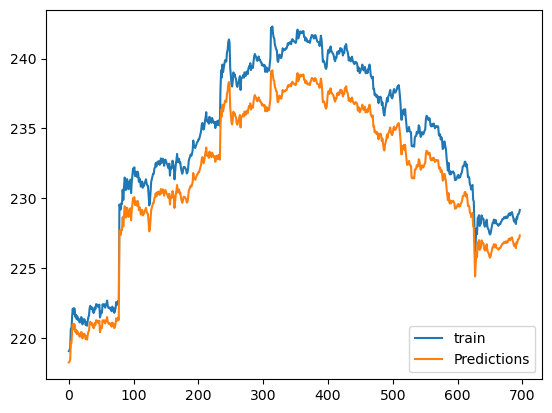

[[0.90359424 0.94152781 1.02824194 ... 3.26021204 3.27207609 3.30552313]
 [0.86804047 0.90746147 0.99714252 ... 3.25053753 3.26243677 3.29598163]
 [0.77445285 0.81839433 0.91682941 ... 3.22680604 3.23879246 3.27257969]
 ...
 [2.83103431 2.81864563 2.78818154 ... 1.34080004 1.36939554 1.44749624]
 [2.84332876 2.83099388 2.80066411 ... 1.31452713 1.34368187 1.42319436]
 [2.87793615 2.86575024 2.83579222 ... 1.23692503 1.26786549 1.35184471]]


In [113]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)

In [114]:
error_main.shape

(697, 697)

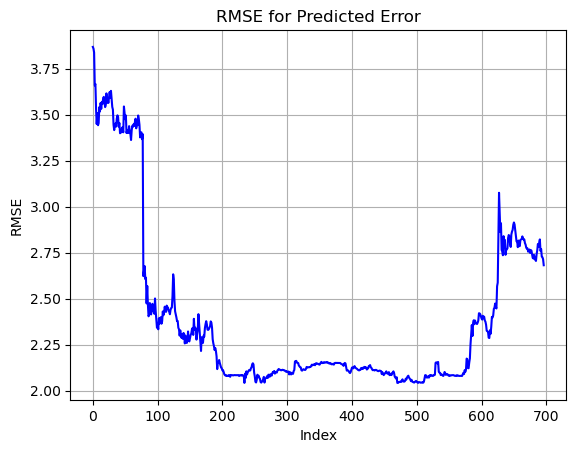

In [115]:
error = np.mean(error_main, axis=1)
plt.plot(np.arange(697), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [116]:
final_pred

array([218.23352051, 218.29650879, 218.45022583, 219.67349243,
       219.61950684, 220.48797607, 220.96502686, 220.61920166,
       221.00387573, 220.93673706, 220.42590332, 220.56451416,
       220.28567505, 220.47900391, 220.24951172, 220.32183838,
       220.11901855, 220.07794189, 220.2585144 , 220.42501831,
       220.35299683, 219.95703125, 220.27648926, 220.16848755,
       220.28533936, 220.1020813 , 219.90753174, 220.10531616,
       219.8677063 , 220.16851807, 220.41690063, 220.50762939,
       220.99649048, 221.1539917 , 221.01446533, 220.94390869,
       221.04598999, 220.79400635, 220.69049072, 220.74450684,
       221.04602051, 220.93353271, 221.25750732, 221.22149658,
       221.2265625 , 221.08901978, 221.06399536, 221.22598267,
       220.40374756, 220.60943604, 220.81646729, 220.69500732,
       221.24847412, 221.1539917 , 221.24847412, 221.24847412,
       221.03250122, 221.19821167, 221.28393555, 221.48809814,
       221.15600586, 221.0189209 , 221.05047607, 220.97